# Installing BERTopic

We start by installing BERTopic from PyPi:

In [1]:
%%capture
!pip install bertopic

## Restart the Notebook
After installing BERTopic, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

# **Data**
For this tutorial, we will be needing to extract all Trump's Tweet from his @realDonalTrump account. We will be removing all retweet and focus on his original tweets. 

Moreover, since we are looking at his tweets over time, we will be saving all timestamps related to his tweets.

In [2]:
import re
import pandas as pd
from datetime import datetime

In [10]:
#Read data
trump = pd.read_csv('https://drive.google.com/u/0/uc?id=1UbgaMCR_TzdjFUbEsT-kBwgfLMhzW3XP&export=download')   #ldadata psoriasis14.csv
trump.shape

(31425, 6)

In [11]:
trump.head()

,tittle,Journal,pmdate,Info,date,pmid
0,(18)F-Labeling of Mannan for Inflammation Rese...,ACS Med Chem Lett,2016 May 16;7(9):826-30.,Recently mannan from Saccharomyces cerevisiae ...,2016/5/16,27660685
1,(R)-Salbutamol Improves Imiquimod-Induced Psor...,Cells,2020 Feb 24;9(2):511.,Psoriasis is a skin disease that is characteri...,2020/2/24,32102363
2,[[WHAT SHOULD BE KNOWN ABOUT PSORIATIC ARTHRIT...,Acta Med Croatica,2015;69(2):111-5.,Psoriatic arthritis (PsA) is chronic inflammat...,2015/1/1,29076711
3,[15 years experience with biological therapy o...,Cas Lek Cesk,Fall 2016;155(6):285-293.,The publication is summarizing application of ...,2016/10/1,27917631
4,[A case of psoriatic arthropathy complicated w...,Ryumachi,2003 Oct;43(4):672-7.,We report a case of psoriatic arthropathy comp...,2003/10/1,14598661


In [12]:
trump.Info = trump.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.Info.split())), 1)

In [13]:
tweets = trump.Info.to_list()

In [14]:
timestamps = trump.date.to_list()

In [17]:
tweets[0]

'Recently mannan from Saccharomyces cerevisiae has been shown to be able to induce psoriasis and psoriatic arthritis in mice, and the phenotypes resemble the corresponding human diseases. To investigate the pathological processes, we set out to label mannan with fluorine-18 ((18)F) and study the (18)F-labeled mannan in vitro and in vivo with positron emission tomography (PET). Accordingly, mannan has been transformed into (18)F-fluoromannan with (18)F-bicyclo[6.1.0]nonyne. In mouse aorta, the binding of [(18)F]fluoromannan to the atherosclerotic lesions was clearly visualized and was significantly higher compared to blocking assays (P < 0.001) or healthy mouse aorta (P < 0.001). In healthy rats the [(18)F]fluoromannan radioactivity accumulated largely in the macrophage-rich organs such as liver, spleen, and bone marrow and the excess excreted in urine. Furthermore, the corresponding (19)F-labeled mannan has been used to induce psoriasis and psoriatic arthritis in mice, which indicates 

# **Dynamic Topic Modeling**


## Basic Topic Model
To perform Dynamic Topic Modeling with BERTopic we will first need to create a basic topic model using all tweets. The temporal aspect will be ignored as we are, for now, only interested in the topics that reside in those tweets. 

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(stop_words="english")
#vectorizer_model = CountVectorizer(stop_words="english",ngram_range=(1,4))
#topic_model = BERTopic(vectorizer_model=vectorizer_model)

In [19]:
from bertopic import BERTopic
from scipy.cluster import hierarchy as sch
topic_model = BERTopic(vectorizer_model=vectorizer_model, top_n_words=30, min_topic_size=35, calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(tweets)
linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)
hierarchical_topics = topic_model.hierarchical_topics(tweets, linkage_function=linkage_function)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/983 [00:00<?, ?it/s]

2023-01-14 03:54:07,089 - BERTopic - Transformed documents to Embeddings
2023-01-14 03:54:59,739 - BERTopic - Reduced dimensionality
2023-01-14 03:55:32,884 - BERTopic - Clustered reduced embeddings
100%|██████████| 161/161 [00:02<00:00, 78.30it/s]


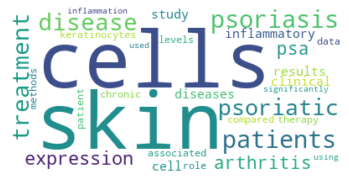

In [ ]:
#from sklearn.datasets import fetch_20newsgroups
#from bertopic import BERTopic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Train topic model
#docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']
#topic_model = BERTopic(verbose=True)
#topics, probs = topic_model.fit_transform(docs)

# Show word cloud
create_wordcloud(topic_model, topic=-1)

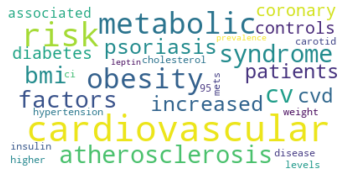

In [ ]:
create_wordcloud(topic_model, topic=0)

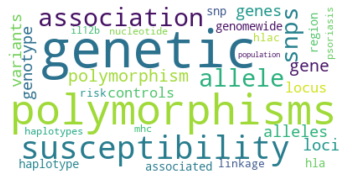

In [ ]:
create_wordcloud(topic_model, topic=1)

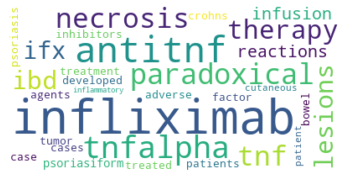

In [ ]:
create_wordcloud(topic_model, topic=2)

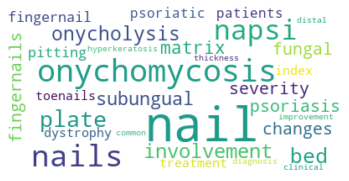

In [ ]:
create_wordcloud(topic_model, topic=3)

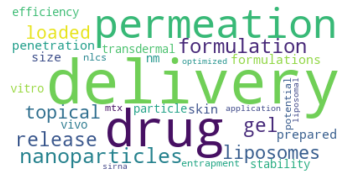

In [ ]:
create_wordcloud(topic_model, topic=4)

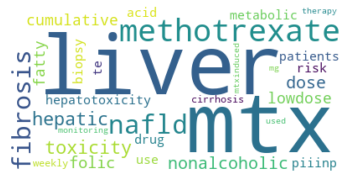

In [ ]:
create_wordcloud(topic_model, topic=5)

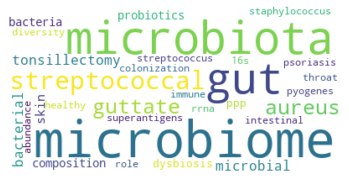

In [ ]:
create_wordcloud(topic_model, topic=6)

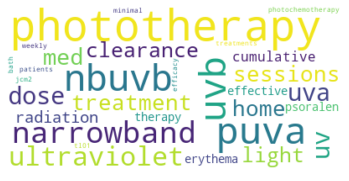

In [ ]:
create_wordcloud(topic_model, topic=7)

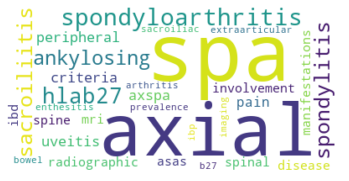

In [ ]:
create_wordcloud(topic_model, topic=8)

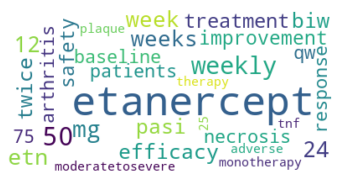

In [ ]:
create_wordcloud(topic_model, topic=9)

-1 refers to all outliers and should typically be ignored.

In [ ]:
topic_nr = freq.iloc[-1]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('dermoscopic', 0.08765475770264909),
 ('dermoscopy', 0.06817013180813072),
 ('pr', 0.04311992296314399),
 ('vessels', 0.038363839132549524),
 ('dotted', 0.03482636675271508),
 ('pp', 0.026748052589882804),
 ('pityriasis', 0.024527407185748844),
 ('red', 0.024175958045276585),
 ('balanitis', 0.02364043548303233),
 ('lp', 0.023624717725106367),
 ('dermatoses', 0.023572098233933192),
 ('gp', 0.023148952499718562),
 ('vascular', 0.02276789767179798),
 ('color', 0.021404103144911483),
 ('diagnosis', 0.02060258680651699),
 ('dermatoscopy', 0.019572427369252347),
 ('features', 0.019361658277789632),
 ('prp', 0.019172581056648232),
 ('scales', 0.018340277012187114),
 ('patchy', 0.018305725602391847),
 ('distribution', 0.017993925545969514),
 ('plc', 0.017376137724332504),
 ('pattern', 0.01730423911747927),
 ('arrangement', 0.016182419642567617),
 ('palmar', 0.015579835793727114),
 ('findings', 0.01551214659966534),
 ('lichen', 0.015187476771656501),
 ('sbcc', 0.015065065090223005),
 ('magnif

In [ ]:
topic_nr = freq.iloc[0]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('cells', 0.005204865458271962),
 ('skin', 0.005191932970005861),
 ('psoriasis', 0.005179532191273971),
 ('patients', 0.0050830681370606385),
 ('disease', 0.004621516499044444),
 ('treatment', 0.00456002514861733),
 ('psoriatic', 0.004478164817235783),
 ('expression', 0.004472083480254389),
 ('psa', 0.004224868414790576),
 ('arthritis', 0.004188060062281877),
 ('inflammatory', 0.00408582063856601),
 ('study', 0.0038968725723007875),
 ('results', 0.003858650443796265),
 ('clinical', 0.0038442627397478057),
 ('diseases', 0.003745363572209806),
 ('cell', 0.0035797865489440622),
 ('keratinocytes', 0.003572558666455294),
 ('role', 0.003344748220113657),
 ('levels', 0.0033117419157994293),
 ('therapy', 0.0033073421423187124),
 ('data', 0.003249800750754897),
 ('patient', 0.003219291642839703),
 ('methods', 0.0032079008739353877),
 ('chronic', 0.0031384289616101656),
 ('compared', 0.003097243432938679),
 ('associated', 0.0030930974998609113),
 ('significantly', 0.003086156317486552),
 ('used

In [ ]:
topic_nr = freq.iloc[1]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('cardiovascular', 0.021679751469742933),
 ('risk', 0.01749897958728457),
 ('metabolic', 0.013727817248827543),
 ('obesity', 0.01196100731500532),
 ('atherosclerosis', 0.009154057939188885),
 ('syndrome', 0.008905853096071614),
 ('cv', 0.008788343997085267),
 ('factors', 0.008566979907174326),
 ('bmi', 0.008342451646579513),
 ('psoriasis', 0.008247092312801164),
 ('increased', 0.008202738897261102),
 ('patients', 0.007978614514431537),
 ('cvd', 0.007905272144158072),
 ('coronary', 0.007729270478702041),
 ('diabetes', 0.007645995539801316),
 ('controls', 0.0076151876761665375),
 ('associated', 0.007477908781707323),
 ('hypertension', 0.00740574494278354),
 ('95', 0.007269532844614966),
 ('higher', 0.0071052036613592105),
 ('ci', 0.006992336788426939),
 ('disease', 0.006827219250651975),
 ('weight', 0.006785880508519097),
 ('levels', 0.006700985462446466),
 ('carotid', 0.006680828997735488),
 ('cholesterol', 0.006554530911675068),
 ('insulin', 0.006539652752570427),
 ('mets', 0.00612424

In [ ]:
topic_nr = freq.iloc[2]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('genetic', 0.020306106135712314),
 ('polymorphisms', 0.01978897136387285),
 ('susceptibility', 0.019602963356452535),
 ('association', 0.019456025126397165),
 ('allele', 0.018544001143922642),
 ('snps', 0.017556469496827227),
 ('polymorphism', 0.01605715908375239),
 ('gene', 0.015995680798928998),
 ('genes', 0.013716100524701786),
 ('variants', 0.01337414716716292),
 ('genotype', 0.013265864475447385),
 ('alleles', 0.013036481598061115),
 ('loci', 0.012725861017478055),
 ('locus', 0.010527769177106324),
 ('controls', 0.01042823085265279),
 ('genomewide', 0.010096963312836132),
 ('snp', 0.010080801799088773),
 ('haplotype', 0.010023293208713695),
 ('associated', 0.009711989923477228),
 ('region', 0.009669333179060224),
 ('hla', 0.009589628282393105),
 ('linkage', 0.008439589275089419),
 ('risk', 0.008277081854721428),
 ('hlac', 0.008243904253667285),
 ('psoriasis', 0.00737766237963227),
 ('il12b', 0.00728824980284452),
 ('nucleotide', 0.007246585569942464),
 ('mhc', 0.0072332270998425

In [ ]:
topic_nr = freq.iloc[3]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('infliximab', 0.037933284163018735),
 ('antitnf', 0.020658824578280503),
 ('tnfalpha', 0.01512363037791849),
 ('paradoxical', 0.014556858763555676),
 ('necrosis', 0.01402288033450193),
 ('tnf', 0.01376657519212931),
 ('therapy', 0.012250527856028858),
 ('ibd', 0.01107115612275465),
 ('lesions', 0.0108536402887685),
 ('ifx', 0.010359122587063953),
 ('reactions', 0.010356409691229303),
 ('infusion', 0.010321638555913783),
 ('psoriasiform', 0.010281402068639199),
 ('adverse', 0.009258036606687526),
 ('factor', 0.009124672409199062),
 ('tumor', 0.009020523345581831),
 ('case', 0.00852096580264588),
 ('cases', 0.008499912411221089),
 ('agents', 0.008170713532907865),
 ('treatment', 0.008170049704699558),
 ('inhibitors', 0.008015343741342065),
 ('patients', 0.007758340177879749),
 ('bowel', 0.00767537880917245),
 ('developed', 0.007592550281941123),
 ('crohns', 0.0073239807378402645),
 ('psoriasis', 0.007175653359857978),
 ('treated', 0.007056038966457416),
 ('cutaneous', 0.006990136799902

In [ ]:
topic_nr = freq.iloc[4]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('nail', 0.10395116398766137),
 ('onychomycosis', 0.030702616571321603),
 ('nails', 0.02900155117333547),
 ('napsi', 0.024530026298726745),
 ('plate', 0.01602646372202326),
 ('bed', 0.01351461392588716),
 ('involvement', 0.0123718446448412),
 ('onycholysis', 0.011184520300753096),
 ('subungual', 0.009985175115593657),
 ('matrix', 0.009023440084681037),
 ('fungal', 0.008459002403401862),
 ('changes', 0.00804177786761643),
 ('severity', 0.007805430453858017),
 ('psoriasis', 0.007788600378627137),
 ('fingernails', 0.007758566215972762),
 ('fingernail', 0.007548875237162687),
 ('pitting', 0.0074817364607054114),
 ('psoriatic', 0.007032261778599382),
 ('patients', 0.006786332382347464),
 ('dystrophy', 0.006404400698151333),
 ('toenails', 0.006148055494543072),
 ('index', 0.0060440873484279905),
 ('treatment', 0.00604369312236409),
 ('hyperkeratosis', 0.005977929560254774),
 ('distal', 0.005919409239305652),
 ('thickness', 0.005737470595774915),
 ('clinical', 0.0055368835637089504),
 ('impr

In [ ]:
topic_nr = freq.iloc[5]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('delivery', 0.03222448129705555),
 ('drug', 0.020415345260278994),
 ('permeation', 0.02013208884276098),
 ('nanoparticles', 0.019006680283169552),
 ('formulation', 0.018111579764641488),
 ('release', 0.016114861268434106),
 ('gel', 0.01573626365772798),
 ('liposomes', 0.014892716752089771),
 ('topical', 0.014824921540867605),
 ('loaded', 0.014038569231906764),
 ('penetration', 0.013688760098697331),
 ('prepared', 0.013606216243315677),
 ('size', 0.01348561457191961),
 ('skin', 0.012820408679407444),
 ('formulations', 0.01227261842658556),
 ('efficiency', 0.011137564465122424),
 ('vitro', 0.010804494566171382),
 ('vivo', 0.01056997475125059),
 ('stability', 0.010562521888808836),
 ('transdermal', 0.010291023352506234),
 ('particle', 0.009668462347715394),
 ('nm', 0.009154729910701589),
 ('entrapment', 0.00914051345412635),
 ('mtx', 0.008953073196052798),
 ('potential', 0.008907274208313274),
 ('nlcs', 0.008857514695137618),
 ('application', 0.008676277616441446),
 ('optimized', 0.0086

In [ ]:
topic_nr = freq.iloc[6]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('liver', 0.044264378891423636),
 ('mtx', 0.04391894977577257),
 ('methotrexate', 0.04129468986226773),
 ('nafld', 0.028161700458981274),
 ('fibrosis', 0.027218742046150612),
 ('toxicity', 0.012578267370175374),
 ('hepatic', 0.01213612480481269),
 ('nonalcoholic', 0.010465907019670343),
 ('dose', 0.010436112109079968),
 ('folic', 0.00918433037844059),
 ('fatty', 0.00791510170465211),
 ('lowdose', 0.00775883550072878),
 ('cumulative', 0.007516130847174684),
 ('hepatotoxicity', 0.007355959236188137),
 ('biopsy', 0.007320503925665353),
 ('patients', 0.006964834382380558),
 ('acid', 0.006626916937936065),
 ('te', 0.006339781255591541),
 ('drug', 0.006327201694779377),
 ('piiinp', 0.006254537073050771),
 ('risk', 0.006004663531937206),
 ('use', 0.005935966918228625),
 ('metabolic', 0.005923112460321208),
 ('weekly', 0.005892585743150421),
 ('cirrhosis', 0.0057678065713750865),
 ('monitoring', 0.005663510808776979),
 ('mg', 0.005650570849094126),
 ('therapy', 0.00561870514919729),
 ('used',

In [ ]:
topic_nr = freq.iloc[7]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('microbiome', 0.03490479277712422),
 ('microbiota', 0.02785726167083622),
 ('gut', 0.024860945938672364),
 ('streptococcal', 0.020949812938569887),
 ('aureus', 0.014601678161731227),
 ('guttate', 0.014376930371213861),
 ('tonsillectomy', 0.014301856223841872),
 ('bacterial', 0.013752943458755962),
 ('microbial', 0.013259091261182911),
 ('skin', 0.011599492730306672),
 ('probiotics', 0.010759803042827509),
 ('composition', 0.010517105999255755),
 ('bacteria', 0.010342827476749174),
 ('dysbiosis', 0.010276436564355177),
 ('ppp', 0.010030986307831367),
 ('intestinal', 0.008536040204512409),
 ('16s', 0.008514076508381178),
 ('throat', 0.008416277512815405),
 ('streptococcus', 0.008378193165509825),
 ('staphylococcus', 0.008142458502832548),
 ('diversity', 0.008081868780719073),
 ('superantigens', 0.007858252009395649),
 ('healthy', 0.007661931404456192),
 ('colonization', 0.007567277857715868),
 ('abundance', 0.007032652841607971),
 ('pyogenes', 0.006959059632989217),
 ('rrna', 0.0067665

In [ ]:
topic_nr = freq.iloc[8]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('phototherapy', 0.04623175628961255),
 ('puva', 0.03584312940272124),
 ('nbuvb', 0.03461319241243883),
 ('uvb', 0.03450477112421849),
 ('narrowband', 0.022391426323473674),
 ('ultraviolet', 0.017650844686811197),
 ('uva', 0.014691993166154549),
 ('uv', 0.014333021555411255),
 ('dose', 0.013946907590007879),
 ('med', 0.011598239453151294),
 ('home', 0.010415745883086412),
 ('treatment', 0.010313028828198529),
 ('sessions', 0.010243962976138343),
 ('clearance', 0.010021750674156301),
 ('light', 0.009954090643743047),
 ('radiation', 0.009521655753234418),
 ('cumulative', 0.009201687831867271),
 ('erythema', 0.008671324999758775),
 ('therapy', 0.008642512456105554),
 ('effective', 0.008595410904107462),
 ('psoralen', 0.00857307413487725),
 ('photochemotherapy', 0.008282856524866985),
 ('tl01', 0.008036828429567284),
 ('jcm2', 0.007262195991711727),
 ('treatments', 0.00714728878944397),
 ('weekly', 0.006974162838671357),
 ('bath', 0.006628516660016316),
 ('efficacy', 0.006539157568385765)

In [ ]:
topic_nr = freq.iloc[9]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('spa', 0.04593578942304518),
 ('axial', 0.03652842782185768),
 ('spondyloarthritis', 0.024163404437986653),
 ('hlab27', 0.021397484878094224),
 ('sacroiliitis', 0.02019054533472049),
 ('spondylitis', 0.019984401027702117),
 ('ankylosing', 0.0177705787127039),
 ('peripheral', 0.016863642726666874),
 ('axspa', 0.016268211470433662),
 ('uveitis', 0.015743649231337906),
 ('criteria', 0.015526538658808741),
 ('pain', 0.013282999315834142),
 ('spine', 0.012392320735367628),
 ('spinal', 0.01206891984812121),
 ('radiographic', 0.011749087690839396),
 ('asas', 0.011669318180892384),
 ('ibd', 0.011483805582280772),
 ('manifestations', 0.011163538626196965),
 ('involvement', 0.010966767107860853),
 ('mri', 0.010818926292187146),
 ('disease', 0.010395106472261884),
 ('prevalence', 0.010280119760287655),
 ('sacroiliac', 0.010200611041512835),
 ('extraarticular', 0.010131699834814477),
 ('ibp', 0.009912552072305559),
 ('arthritis', 0.009831014638097619),
 ('imaging', 0.009500710251724628),
 ('bowe

In [ ]:
topic_nr = freq.iloc[10]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('etanercept', 0.06907110327850334),
 ('50', 0.017641201494834224),
 ('weekly', 0.015834792540830006),
 ('mg', 0.014544008238379673),
 ('etn', 0.013356568704572878),
 ('24', 0.012944078741247474),
 ('12', 0.012776202332942233),
 ('week', 0.012207031522628508),
 ('weeks', 0.012185393969845703),
 ('pasi', 0.011061917711468477),
 ('biw', 0.010949427342425117),
 ('twice', 0.010557946731480724),
 ('efficacy', 0.010520724123465663),
 ('treatment', 0.009709171196489423),
 ('safety', 0.009129835068336638),
 ('improvement', 0.009002813414020663),
 ('75', 0.008188982023318301),
 ('baseline', 0.008042268299119923),
 ('necrosis', 0.007960506628260993),
 ('patients', 0.00794074441960181),
 ('qw', 0.0078077359989195),
 ('arthritis', 0.0077175546345463995),
 ('response', 0.007475250215278064),
 ('monotherapy', 0.007229107191099668),
 ('therapy', 0.007182572707151341),
 ('adverse', 0.006956583694580463),
 ('25', 0.0066854982377298105),
 ('moderatetosevere', 0.006562867965507921),
 ('plaque', 0.006507

In [ ]:
topic_nr = freq.iloc[11]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('mirnas', 0.044212294506258916),
 ('mirna', 0.026081527105099422),
 ('micrornas', 0.023722411790777654),
 ('expression', 0.022120776480102435),
 ('lncrnas', 0.014959511661955997),
 ('hacat', 0.014098092909418172),
 ('rnas', 0.014021514159652334),
 ('proliferation', 0.013997199465879654),
 ('rna', 0.013906352620445123),
 ('noncoding', 0.013218125010630837),
 ('mir146a', 0.01246204388736584),
 ('keratinocytes', 0.011972705301608662),
 ('target', 0.010880258943142594),
 ('circrnas', 0.010645658734533723),
 ('upregulated', 0.010462771994983432),
 ('microrna', 0.010208228811829999),
 ('mir21', 0.009904428709177859),
 ('prins', 0.009442772384085314),
 ('apoptosis', 0.009337236627089535),
 ('skin', 0.008903061017667201),
 ('lncrna', 0.008871382278778102),
 ('pathogenesis', 0.008782379619293198),
 ('mir31', 0.008743135231157276),
 ('overexpression', 0.008678192151452768),
 ('gene', 0.008639993680253408),
 ('downregulated', 0.008571844629899886),
 ('cell', 0.008477987240829696),
 ('role', 0.0

In [ ]:
topic_nr = freq.iloc[12]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('tofacitinib', 0.060666981095452543),
 ('jak', 0.03863528527707148),
 ('janus', 0.02756973927906801),
 ('inhibitors', 0.022071880224172835),
 ('kinase', 0.02199749347082234),
 ('mg', 0.015400122458047338),
 ('bid', 0.013484380208879598),
 ('inhibitor', 0.013420678398090679),
 ('jakstat', 0.012612077865710964),
 ('placebo', 0.012175141931171701),
 ('oral', 0.01138883700448426),
 ('upadacitinib', 0.011347114747356949),
 ('kinases', 0.011069832884149079),
 ('tyk2', 0.011068766035597003),
 ('jaks', 0.009855908826705421),
 ('phase', 0.009444206550250397),
 ('jak3', 0.009198848238258393),
 ('twice', 0.009019303428778802),
 ('signaling', 0.009007695891043922),
 ('jak1', 0.008991728935165512),
 ('daily', 0.008910802718291274),
 ('efficacy', 0.00875525683833951),
 ('safety', 0.008520927341622195),
 ('opal', 0.008131088344119125),
 ('baricitinib', 0.007779067643718466),
 ('10', 0.00771005000625036),
 ('pathway', 0.007574471297953723),
 ('jaki', 0.0075542052172157155),
 ('jak2', 0.0073182836448

In [ ]:
topic_nr = freq.iloc[13]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('activity', 0.022955144795821652),
 ('psa', 0.022727588761277392),
 ('mda', 0.01816518806569915),
 ('measures', 0.01732449533761514),
 ('composite', 0.01618832183719908),
 ('dapsa', 0.01589853929380459),
 ('assessment', 0.014248583027611412),
 ('domains', 0.013753859566243832),
 ('physical', 0.013389650340177393),
 ('disease', 0.013268073589514092),
 ('arthritis', 0.01317132024381863),
 ('pasdas', 0.012492215287571039),
 ('omeract', 0.011627238672795037),
 ('health', 0.011384301644261617),
 ('questionnaire', 0.010211206186882114),
 ('pain', 0.00970236727320498),
 ('psoriatic', 0.009548701121216172),
 ('haq', 0.009374076529696738),
 ('outcome', 0.00932739527704848),
 ('remission', 0.009318466489523575),
 ('validity', 0.00931692734155043),
 ('psaqol', 0.009266125841492036),
 ('psaid', 0.008637509576713272),
 ('cpdai', 0.008584005567691106),
 ('scores', 0.008274461018235044),
 ('quality', 0.007986769347397513),
 ('measure', 0.007928227416920135),
 ('core', 0.007910853418265059),
 ('pati

In [ ]:
topic_nr = freq.iloc[14]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('images', 0.022718149437568728),
 ('rcm', 0.019274294884160825),
 ('skin', 0.016798298830892112),
 ('imaging', 0.015011332472416278),
 ('noninvasive', 0.014035826533250603),
 ('image', 0.013077907147068081),
 ('accuracy', 0.011724727697777246),
 ('segmentation', 0.011251971212210733),
 ('oct', 0.011043796258013282),
 ('method', 0.010317565090399545),
 ('diagnosis', 0.009682874776898427),
 ('color', 0.009680088973361438),
 ('thickness', 0.009618272617279275),
 ('optical', 0.009260338044075951),
 ('lesions', 0.009241741331306287),
 ('vivo', 0.008806133491056222),
 ('lesion', 0.008786322527606695),
 ('microscopy', 0.00847932342284784),
 ('reflectance', 0.00842366590907572),
 ('confocal', 0.008393285156090094),
 ('technique', 0.008350197865888144),
 ('plaques', 0.008228570121289339),
 ('tewl', 0.008193070246116952),
 ('uninvolved', 0.008038871973755546),
 ('performance', 0.007911222598704451),
 ('perfusion', 0.007888745256358213),
 ('erythema', 0.007498300130380354),
 ('cnn', 0.007446769

In [ ]:
topic_nr = freq.iloc[15]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('ustekinumab', 0.07276955655915286),
 ('il12', 0.015234868815474426),
 ('mg', 0.013888316611046465),
 ('45', 0.012999691471418714),
 ('p40', 0.012972371474166048),
 ('week', 0.012869875298633596),
 ('90', 0.012534045224460066),
 ('12', 0.011073476550767928),
 ('il23', 0.0109870437261573),
 ('weeks', 0.010860817835911293),
 ('subunit', 0.010283777360298526),
 ('response', 0.010278100266122572),
 ('antibody', 0.01014085871930295),
 ('placebo', 0.009819840781226658),
 ('monoclonal', 0.009777009323465874),
 ('phase', 0.009557930733263822),
 ('safety', 0.009288519943089853),
 ('efficacy', 0.008834340770037785),
 ('pasi', 0.008749407689832152),
 ('trials', 0.007978767239074909),
 ('clinical', 0.007963982739149021),
 ('75', 0.00783009859736605),
 ('treatment', 0.007817823360653375),
 ('patients', 0.007173174499782098),
 ('crohns', 0.006791323174211278),
 ('dosing', 0.006548841814337314),
 ('cd', 0.006189581984655434),
 ('plaque', 0.006118340188644909),
 ('kg', 0.006044740836934788),
 ('mode

In [ ]:
topic_nr = freq.iloc[16]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('secukinumab', 0.0932692012256123),
 ('mg', 0.031817215594337055),
 ('300', 0.02999537970049111),
 ('150', 0.023310734948204827),
 ('week', 0.022436452508727216),
 ('52', 0.0142319358149953),
 ('safety', 0.014211504105381554),
 ('placebo', 0.013623185257352332),
 ('weeks', 0.013051504212088397),
 ('efficacy', 0.012695735073272277),
 ('pasi', 0.011858143969238536),
 ('response', 0.010974080086509163),
 ('75', 0.010142751884570969),
 ('sustained', 0.009761205321355012),
 ('moderatetosevere', 0.009754405307394609),
 ('90', 0.009627703546851161),
 ('vs', 0.009585809505016042),
 ('plaque', 0.008906430409426177),
 ('baseline', 0.008550367711303271),
 ('monoclonal', 0.008175220450037799),
 ('antibody', 0.008051839795128626),
 ('treatment', 0.007942738408671459),
 ('12', 0.007759746378300165),
 ('patients', 0.007739766520972772),
 ('phase', 0.007632697250795528),
 ('respectively', 0.0075053737180550955),
 ('16', 0.0072512349857734686),
 ('index', 0.006897992489375553),
 ('dose', 0.0068071092

In [ ]:
topic_nr = freq.iloc[17]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('apremilast', 0.09864830977696776),
 ('pde4', 0.03383017359044509),
 ('phosphodiesterase', 0.01881123656870149),
 ('inhibitor', 0.013304446311462211),
 ('oral', 0.010994995014580056),
 ('week', 0.010829919735631134),
 ('placebo', 0.010757926341686897),
 ('bid', 0.010461255216821258),
 ('camp', 0.010174010105612048),
 ('safety', 0.010103180897471923),
 ('mg', 0.009918384195521036),
 ('16', 0.009878719169593963),
 ('nausea', 0.009668787607666028),
 ('efficacy', 0.009252546193670717),
 ('20', 0.008904055504758597),
 ('moderate', 0.008781834996532598),
 ('30', 0.008252256231737646),
 ('cyclic', 0.008166911393757343),
 ('diarrhea', 0.007902210397704248),
 ('roflumilast', 0.007763638007487955),
 ('phase', 0.007700686329821409),
 ('treatment', 0.0075203514152350015),
 ('phosphodiesterase4', 0.007464048827184778),
 ('inhibitors', 0.007304154927245107),
 ('plaque', 0.006996280771715465),
 ('achieved', 0.006920502857939192),
 ('adverse', 0.006713876518144695),
 ('drug', 0.006543075860717161),


In [ ]:
topic_nr = freq.iloc[18]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('differentiation', 0.024666380119608654),
 ('epidermis', 0.024293001407359228),
 ('keratinocytes', 0.02385316691528007),
 ('epidermal', 0.022317967430619805),
 ('expression', 0.02147684710081958),
 ('keratinocyte', 0.019115481867942912),
 ('basal', 0.016764518319065908),
 ('normal', 0.016382280169732682),
 ('cell', 0.015198214821035635),
 ('skin', 0.013971495750094124),
 ('human', 0.013756008760412683),
 ('expressed', 0.013362552264623214),
 ('keratin', 0.01248253095041916),
 ('proliferation', 0.011422309480891669),
 ('protein', 0.011407979487292299),
 ('layer', 0.010726662903256998),
 ('suprabasal', 0.010461969961610753),
 ('layers', 0.009310771354665357),
 ('mrna', 0.009022898604155075),
 ('growth', 0.008843756283700129),
 ('cells', 0.008248026267157824),
 ('proteins', 0.007967454943720627),
 ('cultured', 0.007346106965246413),
 ('squamous', 0.0071134292035155275),
 ('kinase', 0.0070667907218494004),
 ('mice', 0.007063660228530036),
 ('barrier', 0.007049421129988852),
 ('hair', 0.0

In [ ]:
topic_nr = freq.iloc[19]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('guidelines', 0.02878247567037579),
 ('systemic', 0.014921596983010753),
 ('consensus', 0.01448722371616589),
 ('dermatologists', 0.013492286898627661),
 ('biologic', 0.013328927236895756),
 ('treatment', 0.013231025972695794),
 ('biologics', 0.012565521817486052),
 ('psoriasis', 0.010237578844333193),
 ('management', 0.009963210866292697),
 ('therapy', 0.009508459629289305),
 ('therapies', 0.009487847995238217),
 ('delphi', 0.009358556379002432),
 ('agents', 0.009036103950976952),
 ('recommendations', 0.008997153371995721),
 ('treatments', 0.00898108608992565),
 ('care', 0.008908668863535724),
 ('severe', 0.008776618338164543),
 ('options', 0.00855580528996179),
 ('patient', 0.0083570654029943),
 ('goals', 0.008306156538082284),
 ('survey', 0.007753022815724074),
 ('moderate', 0.007650534905577498),
 ('therapeutic', 0.0075763212624650016),
 ('use', 0.007556507716883599),
 ('practice', 0.007290070831279136),
 ('experts', 0.007217642011979427),
 ('moderatetosevere', 0.0070394456247110

In [ ]:
topic_nr = freq.iloc[20]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('extract', 0.03041870467219582),
 ('indigo', 0.020152988195462473),
 ('plant', 0.019546564287347662),
 ('plants', 0.016814713210190655),
 ('naturalis', 0.01680790064783316),
 ('extracts', 0.015410545944657088),
 ('compounds', 0.014199562441578826),
 ('herbal', 0.013526055466377243),
 ('traditional', 0.012380264461877406),
 ('medicine', 0.012096885621553179),
 ('medicinal', 0.01203358068625957),
 ('used', 0.010837034590512332),
 ('antiinflammatory', 0.009722273673569861),
 ('tryptanthrin', 0.009552349825753257),
 ('leaves', 0.009096330166161152),
 ('pharmacological', 0.008479468773746229),
 ('antioxidant', 0.008406306006538043),
 ('bioactive', 0.008395080243514753),
 ('activity', 0.00831830950164576),
 ('antipsoriatic', 0.00796558050717539),
 ('effects', 0.007828013415995538),
 ('ethnopharmacological', 0.007499998546376072),
 ('acid', 0.007487466718471129),
 ('potential', 0.007468534019774494),
 ('tgp', 0.007011754503082556),
 ('phytochemical', 0.006982462187298902),
 ('chemical', 0.0

We can visualize the basic topics that were created with the Intertopic Distance Map. This allows us to judge visually whether the basic topics are sufficient before proceeding to creating the topics over time. 

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [ ]:
topic_model.visualize_term_rank()

In [ ]:
topic_model.generate_topic_labels()

['-1_cells_skin_psoriasis',
 '0_cardiovascular_risk_metabolic',
 '1_genetic_polymorphisms_susceptibility',
 '2_infliximab_antitnf_tnfalpha',
 '3_nail_onychomycosis_nails',
 '4_delivery_drug_permeation',
 '5_liver_mtx_methotrexate',
 '6_microbiome_microbiota_gut',
 '7_phototherapy_puva_nbuvb',
 '8_spa_axial_spondyloarthritis',
 '9_etanercept_50_weekly',
 '10_mirnas_mirna_micrornas',
 '11_tofacitinib_jak_janus',
 '12_activity_psa_mda',
 '13_images_rcm_skin',
 '14_ustekinumab_il12_mg',
 '15_secukinumab_mg_300',
 '16_apremilast_pde4_phosphodiesterase',
 '17_differentiation_epidermis_keratinocytes',
 '18_guidelines_systemic_consensus',
 '19_extract_indigo_plant',
 '20_mice_imqinduced_imiquimod',
 '21_adalimumab_week_ada',
 '22_children_pediatric_childhood',
 '23_acitretin_retinoids_retinoid',
 '24_tb_tuberculosis_ltbi',
 '25_tnf_rheumatoid_crohns',
 '26_covid19_pandemic_vaccination',
 '27_pregnancy_women_birth',
 '28_uvb_ultraviolet_irradiation',
 '29_efalizumab_cd11a_itolizumab',
 '30_life

In [ ]:
topic_model.get_topics()